<a href="https://colab.research.google.com/github/milkywaysandy/Heart-Failure-Classification/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Introduction to Supervised Machine Learning - Final Project
---

Heart Failure is a very common event causes by the cardiovascular disease (CVDs). CVDs is one of the most important topic in medicine, which estimated to take away 17.9 million lives each year worldwide. Thus, building a high precision and accuracy machine learning model for early detection is in need. This real-world clinical dataset included high cardiovascular risk factors such as hypertension, diabetes, hyperlipidaemia, and others, which would give great insights and possible application for **early detection and future prevention as a goal.**

This dataset is based on the records of heart failure patients who had death event as an outcome during the follow up period between 4 to 284 days. I uilterized five different **supervised machine learning models**, such as random forest, Gradient Boosting Classifier, Ada Boosting, Support Vector Machine, and KNN, designed for **classification task** to identify the death event from the records. The best performing model is Random Forest classification with accuracy of 0.875.

Clean dataset!





In [1]:
#load python library
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set color map to have light blue background
sns.set()
%matplotlib inline

In [2]:
#download and load the Heart Failure Clinical Records dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
#print(heart_failure_clinical_records.metadata)
# variable information
#print(heart_failure_clinical_records.variables)

In [3]:
#combine the features and target for other analysis & to check the dataset basic information
df = pd.concat([X, y], axis=1)
print(df.shape)
df.columns

(299, 13)


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

# **Data Clearning and Expolarory Data Analysis**
The heatmap shows the correlation values between a pair of features. As the color shown in the heapmap, serum creatinine,  ejection fraction, age, serum sodium, and follow up time are the most important features that has relatively higher correlation value compare again the death event.

Pair plot gives insights to how the data behave according to a specific pairs of features. The color coded data shows the location of different binary value of the data.

Consider that there is no easy visual classification between the two data value in any of the scatter plot, SVM and KNN models probably will not do well in this dataset. Both SVM and KNN models were based on separating the data into groups.

In [ ]:
#check data type for consisitancy
df.info() #Find value with NaN
df.dtypes

In [13]:
#basic drop deplicate
print("Before drop duplicate, the shape is:", df.shape)
df.drop_duplicates()
print("After drop duplicate, the shape is:", df.shape)
#this concluded there is no duplicate

Before drop duplicate, the shape is: (299, 13)
After drop duplicate, the shape is: (299, 13)


In [5]:
# function for outlier analysis to make sure there is no particular data point need to be aware of
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
#run function with the dataset
find_outliers_IQR(df)

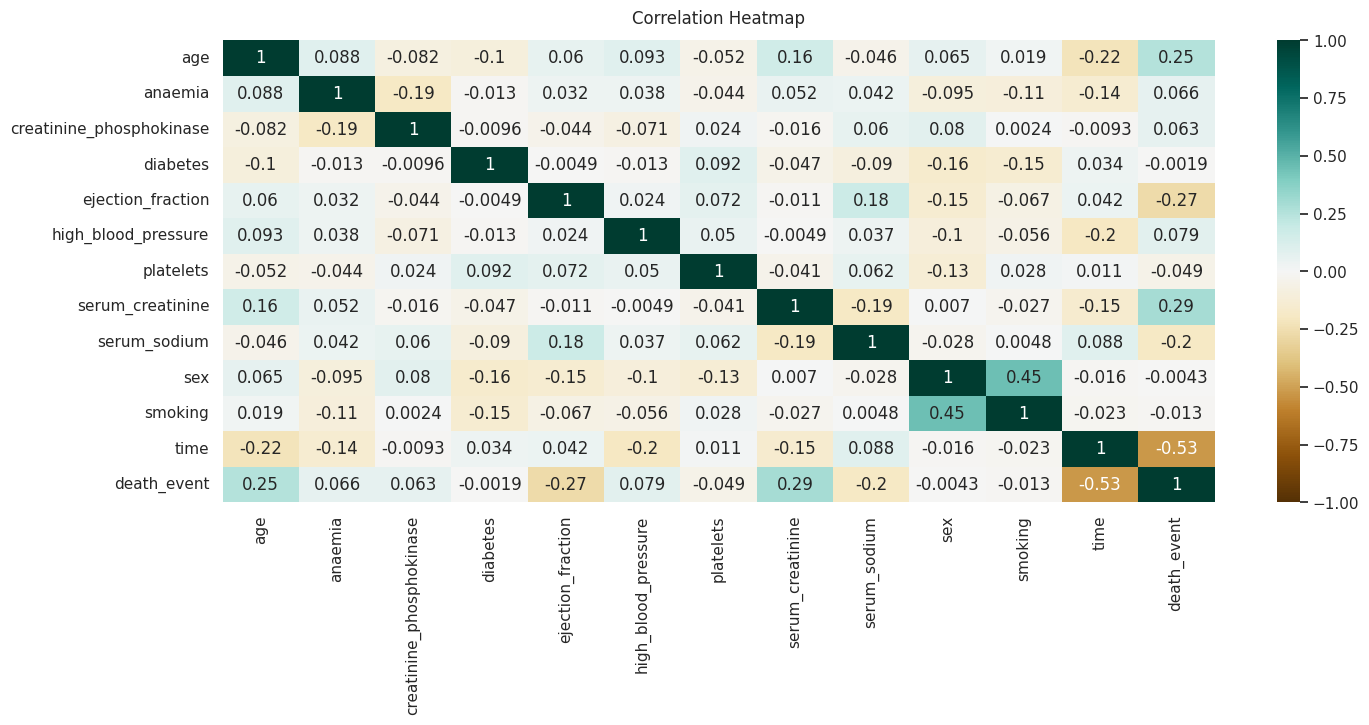

In [16]:
#Understand the corrlation between feature & get heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

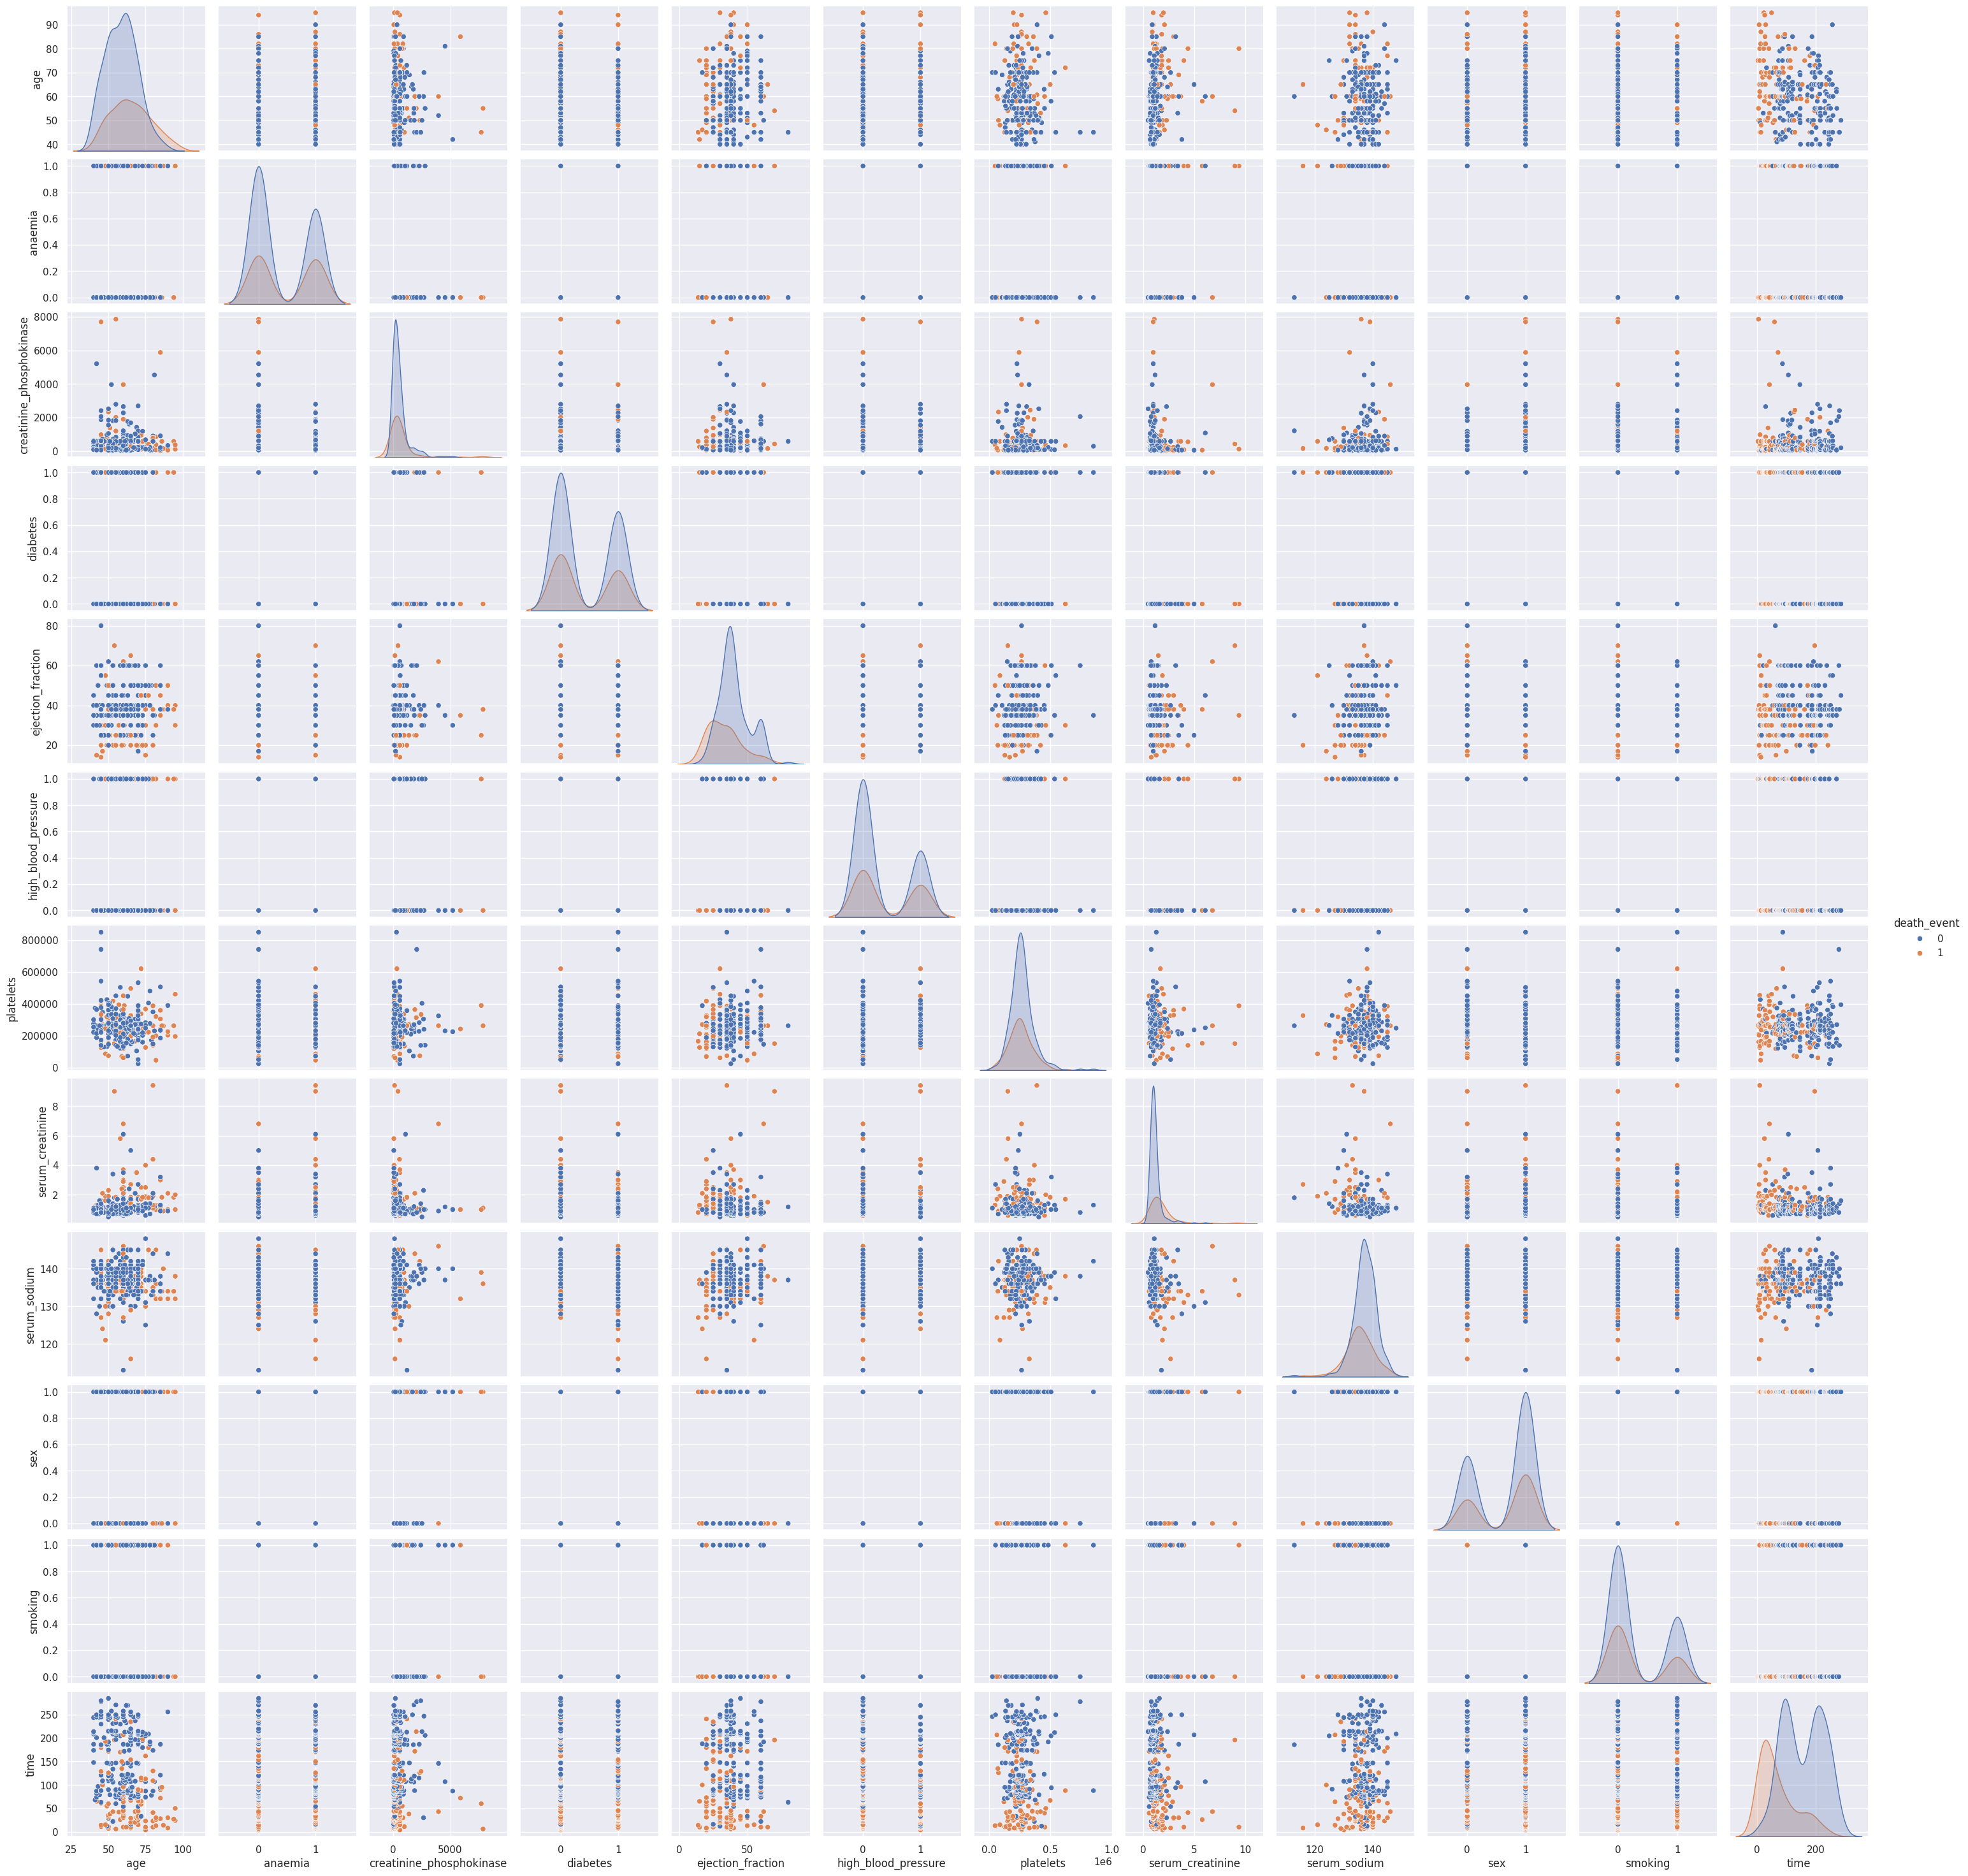

In [23]:
sns.pairplot(df, vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',\
       'ejection_fraction', 'high_blood_pressure', 'platelets',\
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'], hue='death_event', dropna = True,diag_kind="kde")

# **MODELING**

**Collinearity**

Collinearity is an very important concept in feature selection. It has large impact on Linear Regression model; however, it also increase the difficult to classify tree based machine learning model. Collinearity is when two features are highly correlated to each other. When a pair of features are highly correlated, the decision of such feature at the leaf level would be unstable and cost overall standard error associated with such two features to increase.

In the correlation heatmap values and the pair plot, there is no evidence of highly correlated pair of features in this dataset. Thus, it **confirmed that there is no such effect with the choice of the model** here.

---
**Multiple Models used**

Random Forest, Gradient Boosting Classifier, Ada Boosting, Support Vector Machine, KNN, and Cat Boosting

---
**Model used not covered by course**


Cat boosting model is another tree based model that bagging with both categorical and gradient boosting data. This is not a model cover in the class.

---
**Imbalance issue**

Unfortunately, this dataset has data imbalance issue.
The binary death event has survive to death ratio of 203 to 96

Address the imbalance issue with two attempted techniques:
Standard Scale - Normalize all features
Used build in Python library: from sklearn.preprocessing import StandardScaler
Not useful - both top models, Random Forest & Gradient Boosting, dropped accuracy score or no effect
Downsampling - Reduce the survive records to match the death event records
Used build in Python library: from sklearn.utils import resample
Improved Random Forest models, but not helping Gradient Boosting.
Clear winner strategy for model turning
Easy for future domain knowledge interpretation


In [4]:
#Split data into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
#Due to the imbalance of dataset, resample to downsample the dataset
from sklearn.utils import resample
df_p = df[df['death_event']==1] #data with death event
df_n = df[df['death_event']!=1] #data with survived event
downsample = resample(df_n, replace=True, n_samples=len(df_p), random_state=42) #resample to downsample
#print(downsample.shape)
df_downsampled = pd.concat([downsample, df_p]) #bring the downsampled with survived event with rest of the data
#print(downsample.shape, df_p.shape, df_downsampled.shape, df_n.shape)

#Split the data with downsampled dataset
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(df_downsampled.iloc[:,:-1],df_downsampled['death_event'], test_size = 0.25, random_state = 0)

In [6]:
# Feature reduction test: pick the top 5 most important features only to train
#df_downsampled.columns
df_downsample_feature= df_downsampled[['age','ejection_fraction','serum_creatinine','serum_sodium', 'time','death_event']]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_downsample_feature.iloc[:,:-1],df_downsample_feature['death_event'], test_size = 0.25, random_state = 1)


In [7]:
## feature scaling (Normalization all features)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Gaussian distribution
#feature scale for the origial dataset
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
#feature scale for downsampled dataset
X_train_ds_sc = sc.fit_transform(X_train_ds)
X_test_ds_sc = sc.transform(X_test_ds)
#feature scale for downsampled and selected feature dataset
X_train_f_ds_sc = sc.fit_transform(X_train_f)
X_test_f_ds_sc = sc.transform(X_test_f)
#Note: total of 5 types of dataset : original - X_train; downsample - X_train_ds; standardscale only - X_train_sc; downsample_scaled - X_train_ds_sc; downsample_scaoed - X_train_f

In [8]:
#random forest Model
from sklearn.ensemble import RandomForestClassifier
def random_forest(Xtrain, ytrain,Xtest,ytest,type):
  rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
  rf_classifier.fit(Xtrain, ytrain)
  rf_y_pred = rf_classifier.predict(Xtest)
  print(type,"dataset accuracy with random forest model:",accuracy_score(ytest, rf_y_pred))
  print(type,"dataset precision with random forest model:",precision_score(ytest, rf_y_pred, average='macro'))
  print(type,"dataset recall with random forest model:",recall_score(ytest, rf_y_pred, average='macro'))
  print(type,"dataset f1 score with random forest model:",f1_score(ytest, rf_y_pred, average='macro'))

In [ ]:
random_forest(X_train, y_train,X_test,y_test,'Original')
random_forest(X_train_sc, y_train,X_test_sc,y_test,'Standard Scaled with original')
random_forest(X_train_ds, y_train_ds,X_test_ds,y_test_ds,'Downsample without scaling')
random_forest(X_train_ds_sc, y_train_ds,X_test_ds_sc,y_test_ds,'Downsample with standard scaling')
random_forest(X_train_f_ds_sc, y_train_f,X_test_f_ds_sc,y_test_f,'Feature selected with downsample and standard scaling')

In [10]:
#gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
def gbc(Xtrain, ytrain,Xtest,ytest,type):
  gb_model = GradientBoostingClassifier(max_depth=2, random_state=1)
  gb_model.fit(Xtrain, ytrain)
  gb_y_pred = gb_model.predict(Xtest)
  print(type,"dataset accuracy with gradient boosting model:",accuracy_score(ytest, gb_y_pred))
  print(type,"dataset precision with gradient boosting model:",precision_score(ytest, gb_y_pred, average='macro'))
  print(type,"dataset recall with gradient boosting model:",recall_score(ytest, gb_y_pred, average='macro'))
  print(type,"dataset f1 score with gradient boosting model:",f1_score(ytest, gb_y_pred, average='macro'))

In [ ]:
gbc(X_train, y_train,X_test,y_test,'Original')
gbc(X_train_sc, y_train,X_test_sc,y_test,'Standard Scaled with original')
gbc(X_train_ds, y_train_ds,X_test_ds,y_test_ds,'Downsample without scaling')
gbc(X_train_ds_sc, y_train_ds,X_test_ds_sc,y_test_ds,'Downsample with standard scaling')
gbc(X_train_f_ds_sc, y_train_f,X_test_f_ds_sc,y_test_f,'Feature selected with downsample and standard scaling')

In [12]:
#ada boosting model
from sklearn.ensemble import AdaBoostClassifier
def ada(Xtrain, ytrain,Xtest,ytest,type):
  ada_model = AdaBoostClassifier(n_estimators=100, random_state=0, algorithm='SAMME')
  ada_model.fit(Xtrain,ytrain)
  ada_y_pred = ada_model.predict(Xtest)
  print(type,"dataset accuracy with ada boosting model:",accuracy_score(ytest, ada_y_pred))
  print(type,"dataset precision with ada boosting model:",precision_score(ytest, ada_y_pred, average='macro'))
  print(type,"dataset recall with ada boosting model:",recall_score(ytest, ada_y_pred, average='macro'))
  print(type,"dataset f1 score with ada boosting model:",f1_score(ytest, ada_y_pred, average='macro'))

In [ ]:
ada(X_train, y_train,X_test,y_test,'Original')
ada(X_train_sc, y_train,X_test_sc,y_test,'Standard Scaled with original')
ada(X_train_ds, y_train_ds,X_test_ds,y_test_ds,'Downsample without scaling')
ada(X_train_ds_sc, y_train_ds,X_test_ds_sc,y_test_ds,'Downsample with standard scaling')

In [ ]:
#cat boosting model
! pip install catboost
from catboost import CatBoostClassifier

In [12]:
def cat(Xtrain, ytrain,Xtest,ytest,type):
  cat = CatBoostClassifier(iterations=1000)
  cat.fit(X_train, y_train)
  cat_y_pred = cat.predict(X_test)
  print(type,"dataset accuracy with cat boosting model:",accuracy_score(ytest, cat_y_pred))
  print(type,"dataset precision with cat boosting model:",precision_score(ytest, cat_y_pred, average='macro'))
  print(type,"dataset recall with cat boosting model:",recall_score(ytest, cat_y_pred, average='macro'))
  print(type,"dataset f1 score with cat boosting model:",f1_score(ytest, cat_y_pred, average='macro'))

In [ ]:
cat(X_train, y_train,X_test,y_test,'original')
cat(X_train_sc, y_train,X_test_sc,y_test,'Standard Scaled with original')

In [14]:
#vector support machine model (SVM)
from sklearn.svm import SVC
def svc(Xtrain, ytrain,Xtest,ytest,type):
    svc_classifier = SVC(kernel = 'rbf', random_state = 0)
    svc_classifier.fit(Xtrain, ytrain)
    svc_y_pred = svc_classifier.predict(Xtest)
    print(type,"dataset accuracy with SVM model:", accuracy_score(ytest, svc_y_pred))
    print(type,"dataset precision with SVM model:", precision_score(ytest, svc_y_pred, average='macro'))
    print(type,"dataset recall with SVM model:", recall_score(ytest, svc_y_pred, average='macro'))
    print(type,"dataset f1 score with SVM model:", f1_score(ytest, svc_y_pred, average='macro'))

In [ ]:
svc(X_train, y_train,X_test,y_test,'Original')
svc(X_train_sc, y_train,X_test_sc,y_test,'Standard Scaled with original')
svc(X_train_ds, y_train_ds,X_test_ds,y_test_ds,'Downsample without scaling')
svc(X_train_ds_sc, y_train_ds,X_test_ds_sc,y_test_ds,'Downsample with standard scaling')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

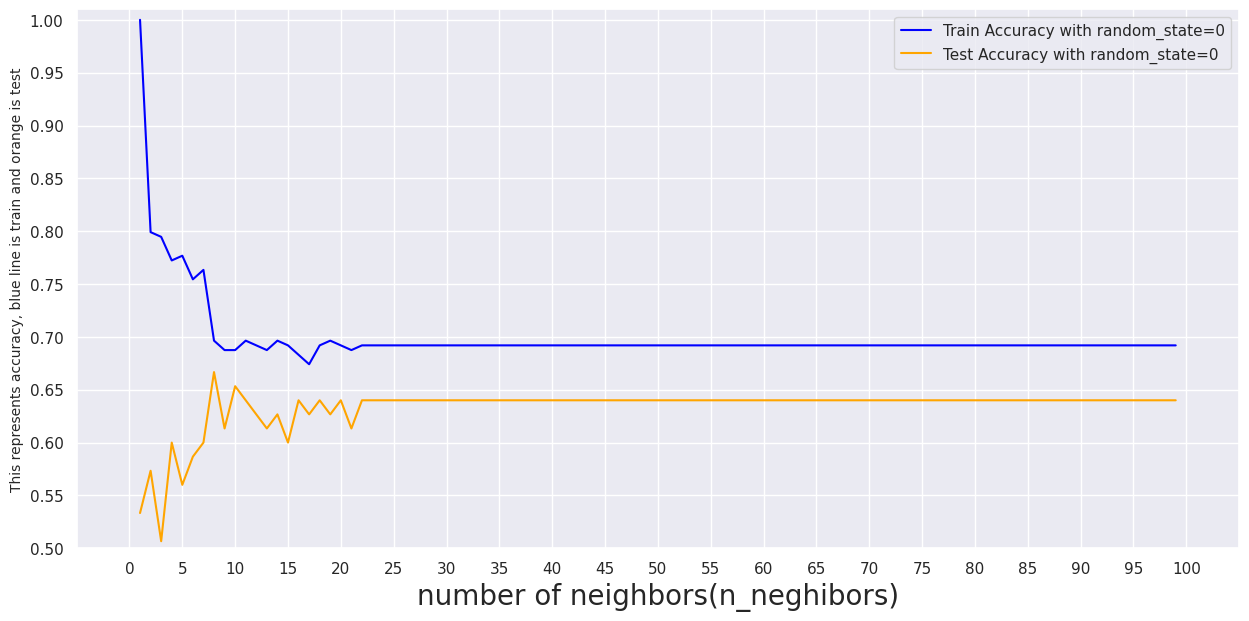

In [53]:
#knn model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train , y_train)
number_of_neighbors = range(1,100)     # number of neighbors = [1,2,3,...,99,100]

knn_train_accuracy = []
knn_test_accuracy = []

for i in number_of_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=i )
    knn_classifier.fit(X_train , y_train)
    knn_train_accuracy.append( knn_classifier.score(X_train,y_train) )
    knn_test_accuracy.append( knn_classifier.score(X_test,y_test) )
# "train_accuracy" & "test accuracy" are filled now

# -------------------------------------------------------------------------------------------------------------
# ploting
fig , ax = plt.subplots(figsize=(15,7))
ax.plot(number_of_neighbors , knn_train_accuracy , color="blue" ,label="Train Accuracy with random_state=0")
ax.plot(number_of_neighbors , knn_test_accuracy , color="orange" ,label="Test Accuracy with random_state=0")
ax.set_xlim([-5,105])
ax.set_ylim([0.5,1.01])
ax.set_xticks(np.arange(0,105,5))
ax.set_yticks(np.arange(0.5,1.01,0.05))
ax.set_xlabel("number of neighbors(n_neghibors)", fontsize=20)
ax.set_ylabel("This represents accuracy, blue line is train and orange is test", fontsize=10)
ax.legend()

In [ ]:
print("KNN model original train dataset accuracy:",knn_train_accuracy)
print("KNN model original test dataset accuracy:",knn_test_accuracy)

# **Result and Analysis**

**Multiple iterates training**

To find the best model, few multiple iterates training were done :
Testing six different models with the original dataset :
Random forest and gradient boosting model performance well with this particular dataset.
Standard Scaling (feature normalization) :
	This technique has no effect or reduce performance, probably due to 5 out of 12 were binary features
Downsampling without standard scaling :
This is a effective technique, which produce the winning model
Downsampling combine with standard scaling :
	This technique has no effect or reduce performance, probably due to 5 out of 12 were binary features
Feature reduced :
Surprisingly, the reduction of features only slight dropped the performance of the model overall. However, for better accurate, all features were still chosen.


<ipython-input-25-88017dee7384>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.812
Gradient Boosting: ROC AUC=0.831


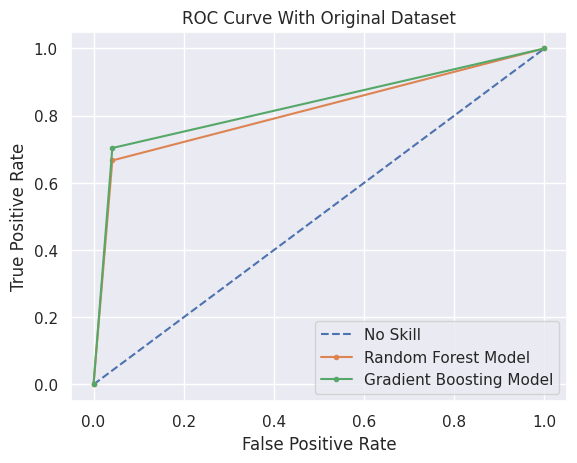

In [25]:
#ROC plots with original data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#original data trainded with random forest
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
#original data trainded with gradient boosting
gb_model = GradientBoostingClassifier(max_depth=2, random_state=1)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only # calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_y_pred)
lr_auc1 = roc_auc_score(y_test, gb_y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc1))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, gb_y_pred)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Model')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Gradient Boosting Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve With Original Dataset')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.873
Gradient Boosting: ROC AUC=0.836


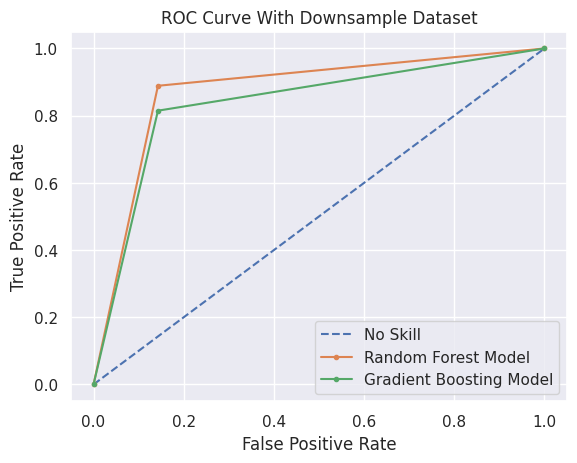

In [24]:
# ROC curve with downsample dataset
# random_forest(X_train_ds, y_train_ds,X_test_ds,y_test_ds,'Downsample without scaling')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#original data trainded with random forest
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rf_classifier.fit(X_train_ds, y_train_ds)
rf_y_pred1 = rf_classifier.predict(X_test_ds)
#original data trainded with gradient boosting
gb_model = GradientBoostingClassifier(max_depth=2, random_state=1)
gb_model.fit(X_train_ds, y_train_ds)
gb_y_pred1 = gb_model.predict(X_test_ds)

ns_probs1 = [0 for _ in range(len(y_test_ds))]
# keep probabilities for the positive outcome only # calculate scores
ns_auc = roc_auc_score(y_test_ds, ns_probs1)
lr_auc = roc_auc_score(y_test_ds, rf_y_pred1)
lr_auc2 = roc_auc_score(y_test_ds, gb_y_pred1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc2))
# calculate roc curves
ns_fpr1, ns_tpr1, _ = roc_curve(y_test_ds, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test_ds, rf_y_pred1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test_ds, gb_y_pred1)

# plot the roc curve for the model
plt.plot(ns_fpr1, ns_tpr1, linestyle='--', label='No Skill')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Random Forest Model')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Gradient Boosting Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve With Downsampled Dataset')
# show the legend
plt.legend()
# show the plot
plt.show()